In [1]:
import pandas as pd
import numpy as numpy
import matplotlib as mpl  
import matplotlib.cm as cm 
import matplotlib.pyplot as plt


# Data Loading and Transformation

In [2]:
marks=pd.read_csv("nas-pupil-marks.csv ") #loading the data set


In [3]:
marks=marks.drop_duplicates()     #deleting the duplicate rows

In [6]:
#marks.fillna(marks.mean(),inplace=True) #handling the nans and due to presence of too many nans filling is done using mean

marks.fillna(0,inplace=True)

In [7]:
marks["performance"]=(marks["Maths %"]+marks["Reading %"]+marks["Science %"]+marks["Social %"]) 
#performance is taken as sum of marks in all subjects
marks["performance"].head()


0    48.15
1    51.14
2    97.78
3    92.67
4    22.88
Name: performance, dtype: float64

In [8]:
#summarising the data by gender 
bg=marks.pivot_table("performance",index=["State"],columns=["Gender"], aggfunc ="mean")

del bg[0]
bg.columns=["Boy","Girl"]
bg.head()

,Boy,Girl
State,,
AN,111.575983,118.665085
AP,62.188431,65.257787
AR,70.734237,69.273129
BR,75.695252,71.638280
CG,68.954173,68.711168


In [9]:
#Total states where boys perform better than girls
boysbest=bg[bg["Boy"]>bg["Girl"]]
len(boysbest)

12

In [10]:
#Total states where girls perform better than boys
girlbest=bg[bg["Boy"]<bg["Girl"]]
len(girlbest)

21

In [12]:
girlbest=bg[bg["Boy"]<bg["Girl"]]
len(girlbest)
bg["diff"]=abs(bg["Boy"]-bg["Girl"])
maxdiff=bg["diff"].max()
mindiff=bg["diff"].min()
maxstate=bg[bg["diff"]==maxdiff]
minstate=bg[bg["diff"]==mindiff]
print("maximum difference between girls and boys performance\n",maxstate,"\n")
print("minimum dofference between girls and boys performance \n",minstate,"\n")


maximum difference between girls and boys performance
               Boy        Girl      diff
State                                  
DD     181.771355  191.580112  9.808756 

minimum dofference between girls and boys performance 
              Boy       Girl      diff
State                                
CG     68.954173  68.711168  0.243005 



In [13]:
maxperfboy=bg["Boy"].max()
minperfboy=bg["Boy"].min()
maxperfgirl=bg["Girl"].max()
minperfgirl=bg["Girl"].min()
hbstate=bg["Boy"].argmax()
lbstate=bg["Boy"].argmin()
hgstate=bg["Girl"].argmax()
lgstate=bg["Girl"].argmin()
del  bg["diff"]  
print("maximum average  performance of boys is" ,maxperfboy,"in the state",hbstate,"\n")
print("minimum average  performance of boys is" ,minperfboy,"in the state",lbstate,"\n")
print("maximum average  performance of Girls is" ,maxperfgirl,"in the state",hgstate,"\n")
print("minimum average  performance of Girls is" ,minperfgirl,"in the state",lgstate,"\n")


maximum average  performance of boys is 181.77135514 in the state DD 

minimum average  performance of boys is 59.6509441301 in the state HP 

maximum average  performance of Girls is 191.580111524 in the state DD 

minimum average  performance of Girls is 60.8979829172 in the state HP 



c:\users\mohan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """
c:\users\mohan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  
c:\users\mohan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys
c:\users\mohan\appdat

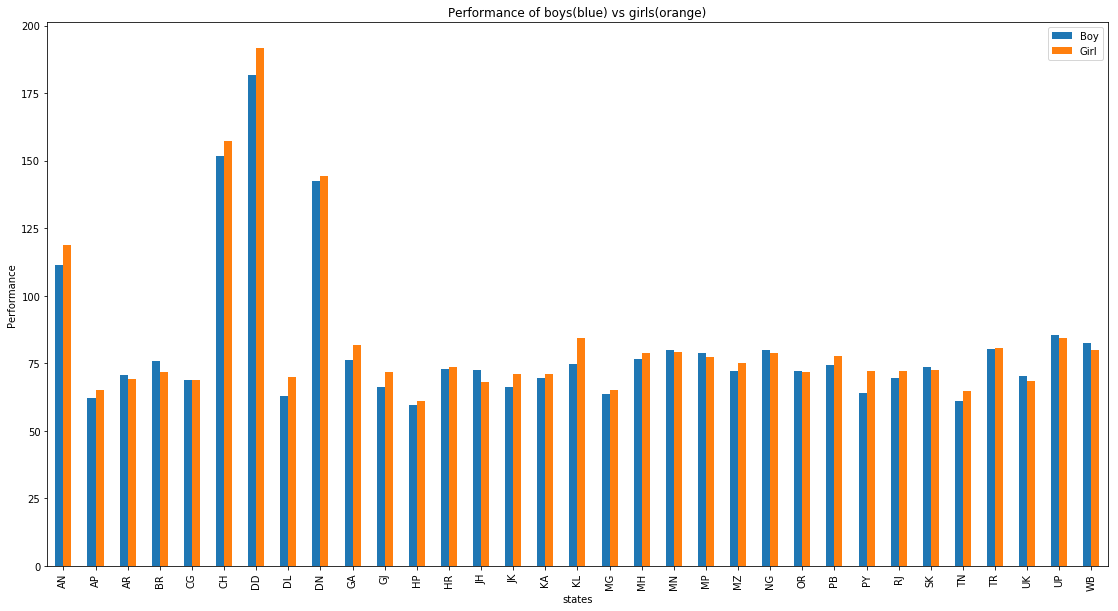

In [14]:
bg.plot(kind="bar",figsize=(19, 10))
plt.xlabel("states")
plt.ylabel("Performance")
plt.title("Performance of boys(blue) vs girls(orange)")
plt.show()

# Girls perform better than Boys